#####  Bank Personal Loan Modelling - Logistic regression

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

from warnings import filterwarnings
filterwarnings('ignore')


In C:\Users\vishal\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\vishal\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\vishal\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\vishal\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\vishal\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_tes

# Reading Dataset

In [2]:
data = pd.read_excel('Bank_Personal_Loan_Modelling.xlsx', sheet_name=1)
data.head()


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


- We have to predict whether customer will get personal loan or not. And what are the other factors affecting to Personal loan

- Dependent i.e. target variable is categorical.

In [3]:
data.shape       # Checking Shape of the dataset

(5000, 14)

In [4]:
data.info()      # Checking Info of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


# Finding Null values

In [5]:
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

## Dropping Unnecessary Columns

In [6]:
data = data.drop(['ID','ZIP Code'], axis=1) # 'ID' & 'ZIP Code' doesn't make any impact on Persoanl Loan
data.head()


,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0


# EDA

<function matplotlib.pyplot.show(close=None, block=None)>

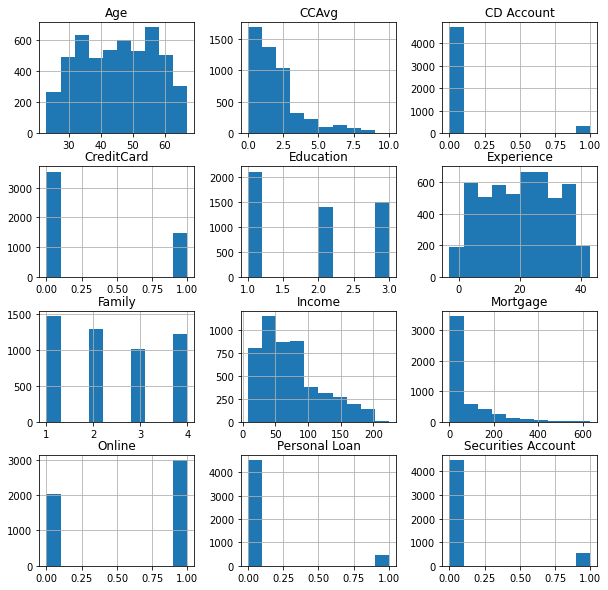

In [7]:
# Plotting histogram with .hist()
data.hist(figsize=(10,10))
plt.show

__Inference from Histogram__

•	Dependent Variable is Binary Categorical i.e. 0 & 1 

•	CD Account, Credit Card, Education, Family, Online, Securities Account are Categorical Variables in Encoded Format.


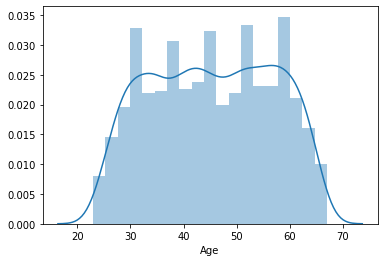

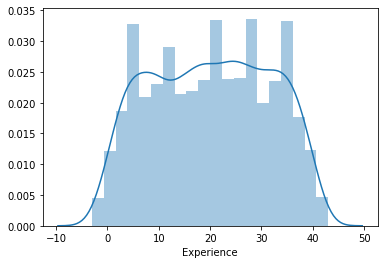

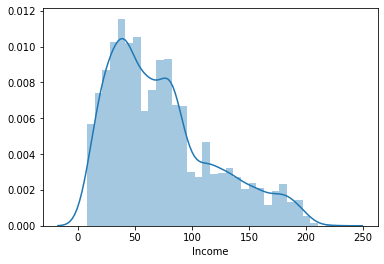

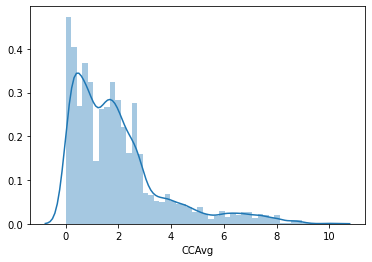

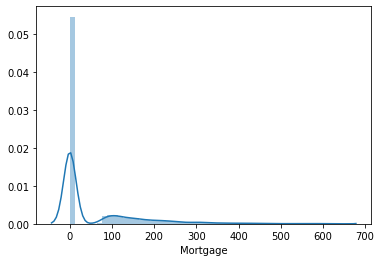

In [8]:
columns = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']
for col in columns:
    sns.distplot(data[col])
    plt.show()


__Inference from Distplot__:

•	Age, Experience, Income, CCAvg is Multimodal having Positive Skewness i.e. Mean > Median

•	Mortgage is Bimodal with Positive Skewness i.e. Mean > Median


## Outliers Detection with Boxplot

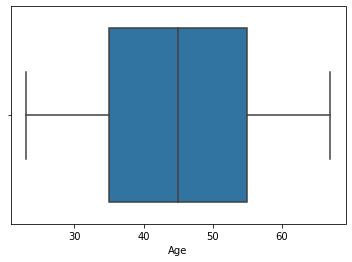

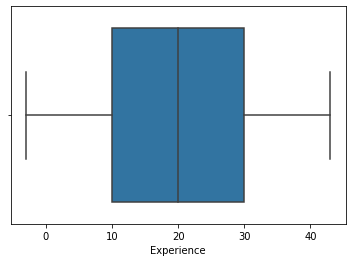

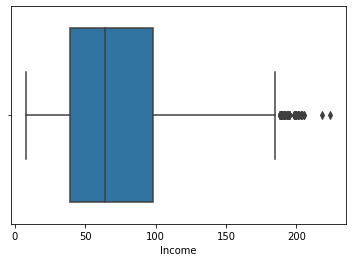

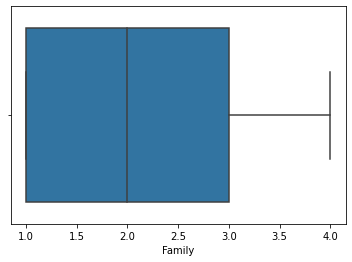

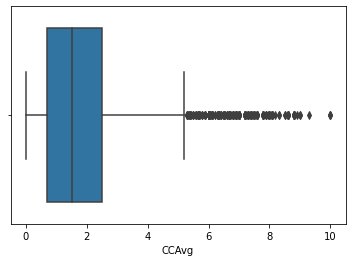

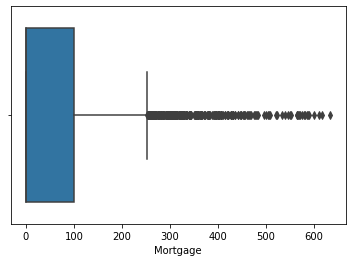

In [9]:
columns = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage']
for col in columns:
    sns.boxplot(data[col])
    plt.show()


__Inference from Boxplot__

•	Age, Experience, Family has No Outlier

•	Mortgage , CCAvg has Many Outliers

•	Income has Moderate Outliers


# Correlation Matrix

<AxesSubplot:>

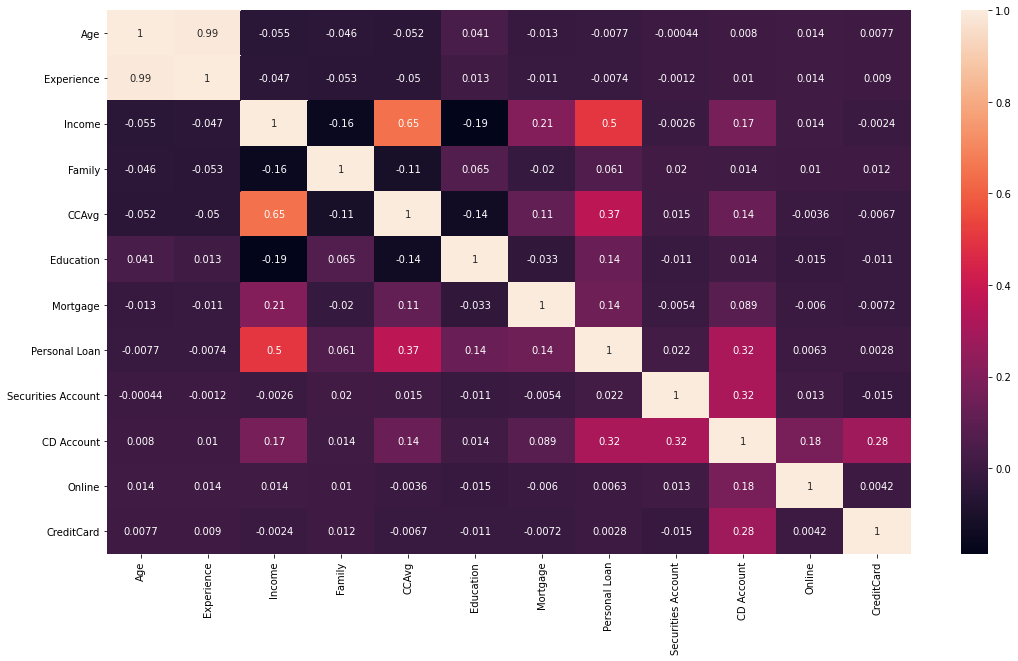

In [10]:
plt.figure(figsize=(18,10))
sns.heatmap(data.corr(), annot = True)


__Infernece from Correlation Matrix__:

•	Personal Loan has Moderate Correlation with CD Account(0.32), CCAvg(0.37), Income(0.5)

•	Personal Loan has Almost No Correlation with other Independent Variables.


# Application of Logistic Regression

•	Target Variable - Personal Loan is Binary Categorical i.e. 0 or 1


In [11]:
data.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


# Splliting dataset

In [12]:
x = data.drop(['Personal Loan'], axis=1)
x.head()


,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,1,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1


In [13]:
y = data.iloc[:, 7:8]
y.head()


,Personal Loan
0,0
1,0
2,0
3,0
4,0


# Importing stats libraries to perform Logistic Regression

In [14]:
# importing stats libraries to perform Logistic Regression

import statsmodels.api as sm


In [15]:
x1 = sm.add_constant(x)

In [16]:
logistic = sm.Logit(y,x1)

In [17]:
result = logistic.fit()

Optimization terminated successfully.
         Current function value: 0.128435
         Iterations 9


In [18]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4988
Method:                           MLE   Df Model:                           11
Date:                Wed, 26 Aug 2020   Pseudo R-squ.:                  0.5938
Time:                        13:20:21   Log-Likelihood:                -642.18
converged:                       True   LL-Null:                       -1581.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -12.1928      1.645     -7.411      0.000     -15.417      -8.968
Age                   -0.0536      0.061     -0.874      0.382      -0.174       0.067
Experience             0.0638      0.061      1.046      0.295      -0.056       0.183
Income                 0.0546      0.003     20.831      0.000       0.049       0.060
Family                 0.6958      0.074      9.364      0.000       0.550       0.841
CCAvg                  0.1240      0.040      3.127      0.002       0.046       0.202
Education              1.7362      0.115     15.088      0.000       1.511       1.962
Mortgage               0.0005      0.001      0.856      0.392      -0.001       0.002
Securities Account    -0.9368      0.286     -3.277      0.001      -1.497      -0.377
CD Account             3.8225      0.324     11.800      0.000       3.188       4.457
Online                -0.6752      0.157     -4.298      0.000      -0.983      -0.367
CreditCard            -1.1197      0.205     -5.462      0.000      -1.522      -0.718
======================================================================================
"""

__Inference from Logistic Regression__:

•	Age, Experience, Mortgage has p value more than 0.05 ie, these are Not Significantly Important

•	All Other Attributes has p value less than 0.05 ie, they are Significantly Important .

•	Out of all these variables,Income, Family, Education, CD Account, Online and Credit Card are Most Significant


• The regression equation is - 

__Personal Loan = -12.19 - 0.054(Age) + 0.064(Experience) + 0.0548(Income) + 0.69(Family) + 0.12(CCAvg) + 1.73(Education) + 0.0005(Mortgage) - 0.94(Securities Account) + 3.82(CD Account) - 0.67(Online) - 1.12(CreditCard)__